# **Filtrado de ruido en señal**

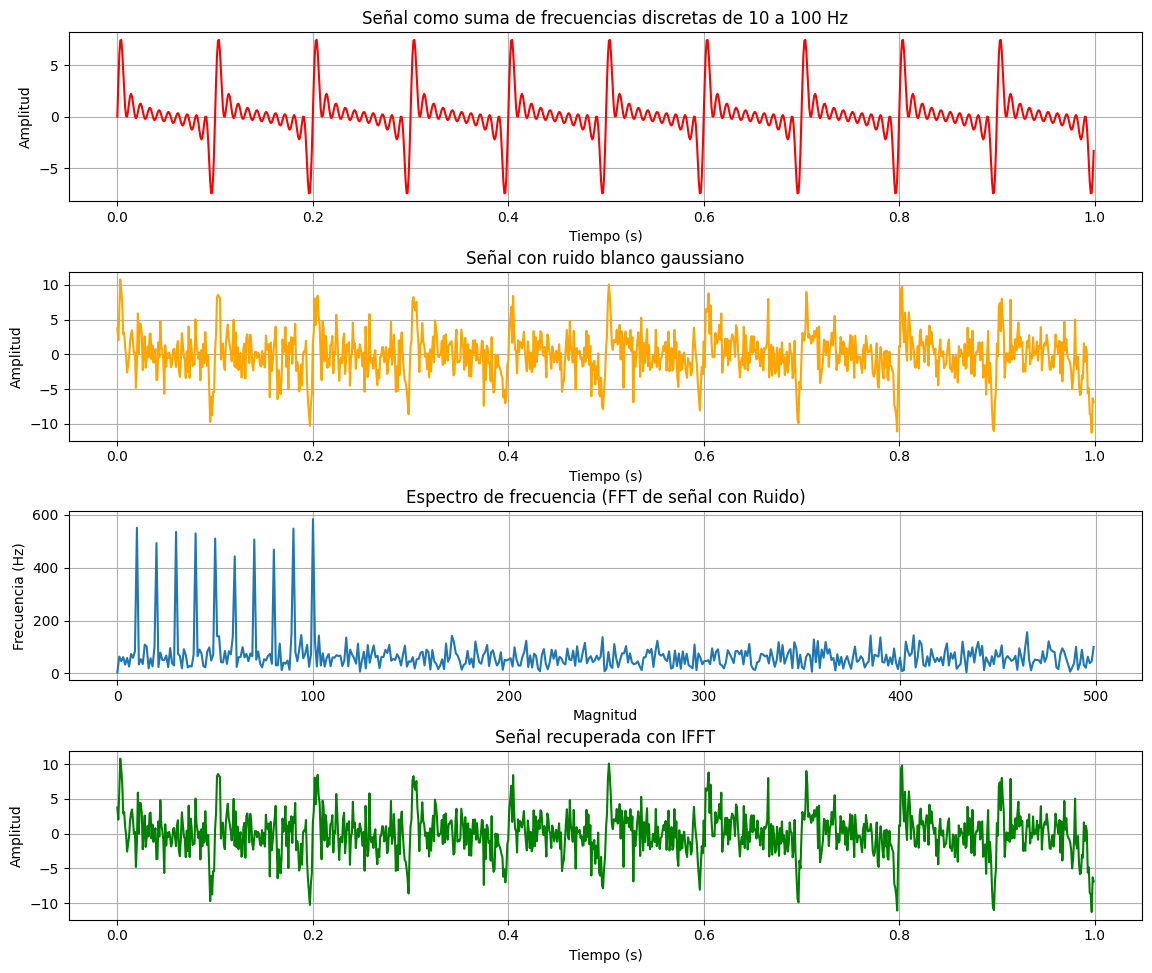

In [37]:
import numpy as np
import matplotlib.pyplot as plt


fs = 1000  # Frecuencia de muestreo (Hz)
t = np.linspace(0, 1, fs, endpoint=False)  # Tiempo (1 segundo)
frequencies = np.arange(10, 101, 10)  # Frecuencias de 10 a 100 Hz en pasos de 10 Hz

# Crear la señal sumando componentes sinusoidales
signal = np.sum([np.sin(2 * np.pi * f * t) for f in frequencies], axis=0)

# Graficar la señal
fig, axs = plt.subplots(4, 1, figsize=(12, 10))
fig.tight_layout(pad=3.0)

axs[0].plot(t, signal, color="red")
axs[0].set_title("Señal como suma de frecuencias discretas de 10 a 100 Hz" )
axs[0].set_xlabel('Tiempo (s)')
axs[0].set_ylabel('Amplitud')
axs[0].grid(True)


noise = np.random.normal(0, 0.3 * max(signal), signal.shape)
noisy_signal = noise + signal


axs[1].plot(t, noisy_signal, color="orange")
axs[1].set_title("Señal con ruido blanco gaussiano" )
axs[1].set_xlabel('Tiempo (s)')
axs[1].set_ylabel('Amplitud')
axs[1].grid(True)


fft_result = np.fft.fft(noisy_signal)
fft_magnitude = np.abs(fft_result)
freq_fft = np.fft.fftfreq(len(t), 1/fs)


axs[2].plot(freq_fft[:len(freq_fft)//2], fft_magnitude[:len(freq_fft)//2])
axs[2].set_title("Espectro de frecuencia (FFT de señal con Ruido)" )
axs[2].set_xlabel('Magnitud')
axs[2].set_ylabel('Frecuencia (Hz)')
axs[2].grid(True)


recovered_signal = np.fft.ifft(fft_result).real
axs[3].plot(t, recovered_signal, color = "green")
axs[3].set_title("Señal recuperada con IFFT" )
axs[3].set_xlabel('Tiempo (s)')
axs[3].set_ylabel('Amplitud')
axs[3].grid(True)

**Filtrando señal**

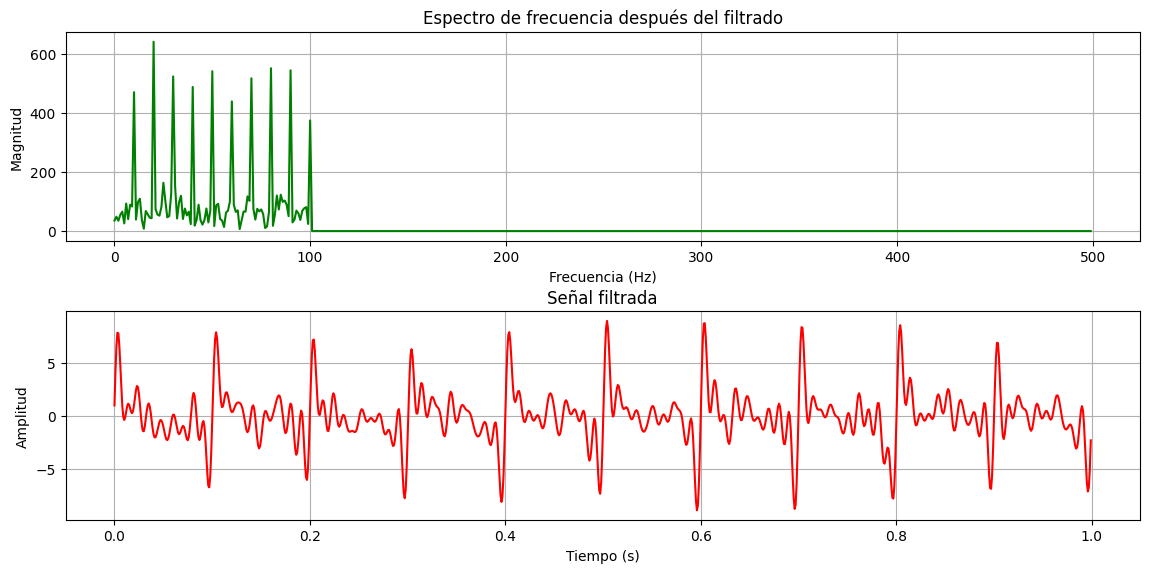

In [36]:
cutoff_freq = 100
fft_filtered = fft_result.copy()
fft_filtered[np.abs(freq_fft) > cutoff_freq] = 0


fig, axs = plt.subplots(2, 1, figsize=(12, 6))
fig.tight_layout(pad=3.0)

fft_magnitude_filtered = np.abs(fft_filtered)
axs[0].plot(freq_fft[:len(freq_fft)//2], fft_magnitude_filtered[:len(freq_fft)//2],color="green")
axs[0].set_title("Espectro de frecuencia después del filtrado")
axs[0].set_xlabel("Frecuencia (Hz)")
axs[0].set_ylabel("Magnitud")
axs[0].grid(True)


filtered_signal = np.fft.ifft(fft_filtered).real

axs[1].plot(t, filtered_signal, color="red")
axs[1].set_title("Señal filtrada")
axs[1].set_xlabel("Tiempo (s)")
axs[1].set_ylabel("Amplitud")
axs[1].grid(True)

